In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import matplotlib.ticker as ticker
import statsmodels.api as sm
import itertools

In [2]:
#Read the dataset
df = pd.read_excel('Sample - Superstore.xls')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# DATA PREPROCESSING

In [4]:
#checking missing values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
 #describing the data
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [7]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [8]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [9]:
#shape of dataset
df.shape

(9994, 21)

In [10]:
 #converting the data type of 'Order Date' column to date time format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
#converting the data type of 'Ship Date' column to date time format
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [11]:
# Checking the duplication in dataset
df.duplicated().sum()

0

In [12]:
df.drop_duplicates(inplace = True)

In [13]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [14]:
# count of unique values
df.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            6144
Quantity           14
Discount           12
Profit           7545
dtype: int64

In [15]:
#Correlation of dataset
df.corr()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [16]:
#covariance of dataset
df.cov()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,8.324169e+06,8.946577e+05,-2442.819776,-25.782598,8.029358,8446.585421
Postal Code,8.946577e+05,1.028080e+09,-476682.766590,910.415885,386.870404,-225045.849445
Sales,-2.442820e+03,-4.766828e+05,388434.455308,278.459923,-3.627228,69944.096586
Quantity,-2.578260e+01,9.104159e+02,278.459923,4.951113,0.003961,34.534769
Discount,8.029358e+00,3.868704e+02,-3.627228,0.003961,0.042622,-10.615173
Profit,8.446585e+03,-2.250458e+05,69944.096586,34.534769,-10.615173,54877.798055


In [17]:
set(df['Category'])

{'Furniture', 'Office Supplies', 'Technology'}

In [18]:
#We shall first analyse the time series of Furniture Sales followed by other categories.


furniture = df.loc[df['Category'] == 'Furniture']

# This shows that we have time-series data of 4 years for furniture sales.
print(furniture['Order Date'].min())
furniture['Order Date'].max()

2014-01-06 00:00:00


Timestamp('2017-12-30 00:00:00')

In [19]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City',
        'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity',
        'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
# furniture data
furniture.sort_values('Order Date')
furniture.isna().sum()

Order Date    0
Sales         0
dtype: int64

In [21]:
#furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [22]:
#Indexing time-series data
furniture = furniture.set_index('Order Date')
#furniture = furniture.apply(lambda x: x.set_index('Order Date'))
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [23]:
# Averaging Daily Sales
y = furniture['Sales'].resample('MS').mean()
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

# FURNITURE DATA TIME-SERIES VISUALIZATION

Text(0, 0.5, 'No of orders-furniture')

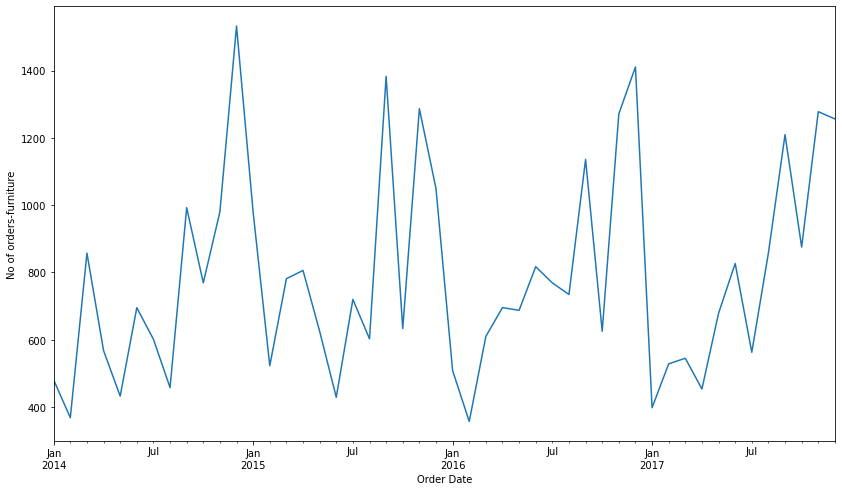

In [24]:
y.plot(figsize=(14, 8))
plt.ylabel('No of orders-furniture')

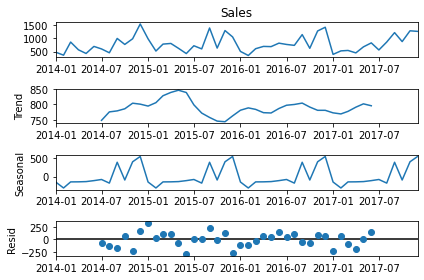

In [25]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomposition.plot()
plt.show()

In [26]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print('Few parameter combinations are:')
print('{} x {}'.format(pdq[1], seasonal_pdq[1]))
print('{} x {}'.format(pdq[2], seasonal_pdq[2]))

Few parameter combinations are:
(0, 0, 1) x (0, 0, 1, 12)
(0, 1, 0) x (0, 1, 0, 12)


In [27]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = model.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:769.0817523205915
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1555.1972404892838
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:477.71701309202774
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:302.27028999297056


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:497.2314433418337
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1473.5718376156926
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:318.0047199116341


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:304.24882803673495
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:720.9252270758113
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:2716.971041244322
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:466.56074298091437
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:291.6261389673049


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:499.53306989772267
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:2546.497193525422
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:319.98848769277646
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:291.87255765311227
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:677.894766843944
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:504.01492914027597
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:486.63785671879367


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:304.9671228171492
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:497.78896630044073
ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1141.9853816368973
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:319.7714068109211


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:306.9113200215026
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:649.905617670944
ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:2347.327635297104
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:458.87055484837106
ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:279.58062317166986
ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:486.18329774398137
ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:3101.3388868685884
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:310.75743684170453
ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:281.55766215066404
ARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:692.1645522067712


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:1439.061470907098
ARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC:479.46321478521355
ARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC:304.207767516514
ARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:480.9259367935389
ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:1064.677133584964
ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC:304.4664675065608
ARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC:304.5842692187963
ARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC:665.7794442579229


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:2657.64586286522
ARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC:468.36379856580044
ARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC:293.3422194967887
ARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:482.57633240705434


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:2487.4807104379047
ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:304.37537863501
ARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:293.7513188300004
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:671.2513547541902


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:742.731250465893
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:479.2003422281134
ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:300.2130611614424
ARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:475.340365858595
ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1887.3360767489676
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:300.6270901312134
ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:302.32649925938154
ARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:649.0318019776464
ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:2917.2566435775902
ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:460.4762687397788
ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:281.38730069302596
ARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:469.52503546586024
ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:2510.801863080509
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:297.7875439928022
ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:283.36610150469573


In [28]:
model = sm.tsa.statespace.SARIMAX(y, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12), enforce_invertibility=False)
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0836      0.248      0.337      0.736      -0.402       0.569
ma.L1         -1.0000   1170.878     -0.001      0.999   -2295.879    2293.879
ma.S.L12      -0.9999   1170.825     -0.001      0.999   -2295.775    2293.775
sigma2      2.681e+04      0.014   1.93e+06      0.000    2.68e+04    2.68e+04


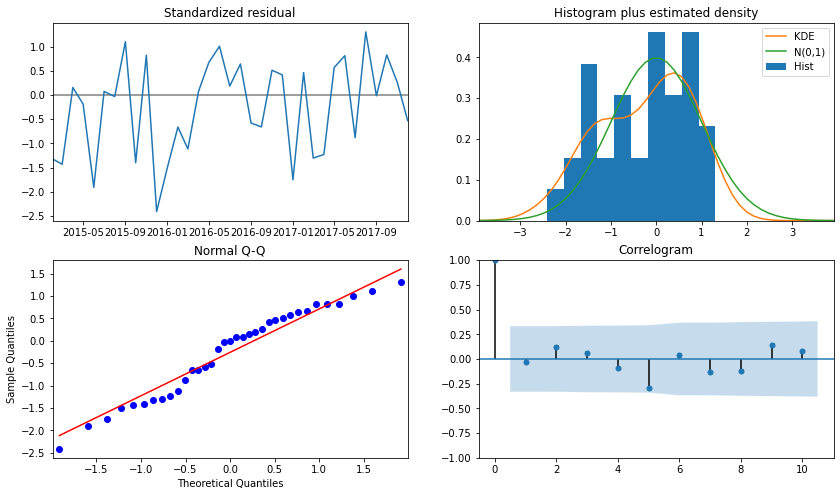

In [29]:
results.plot_diagnostics(figsize=(14, 8))
plt.show()

            lower Sales  upper Sales
Order Date                          
2017-01-01   356.169409  1142.155119
2017-02-01    46.669822   825.340778
2017-03-01   415.050918  1189.990255
2017-04-01   309.647692  1081.504246
2017-05-01   182.024546   951.293038
2017-06-01   283.802245  1050.867288
2017-07-01   352.166727  1117.333145
2017-08-01   221.889010   985.402619
2017-09-01   831.503784  1593.566944
2017-10-01   333.976653  1094.768415
2017-11-01   848.356906  1608.117610
2017-12-01   979.263222  1738.180891


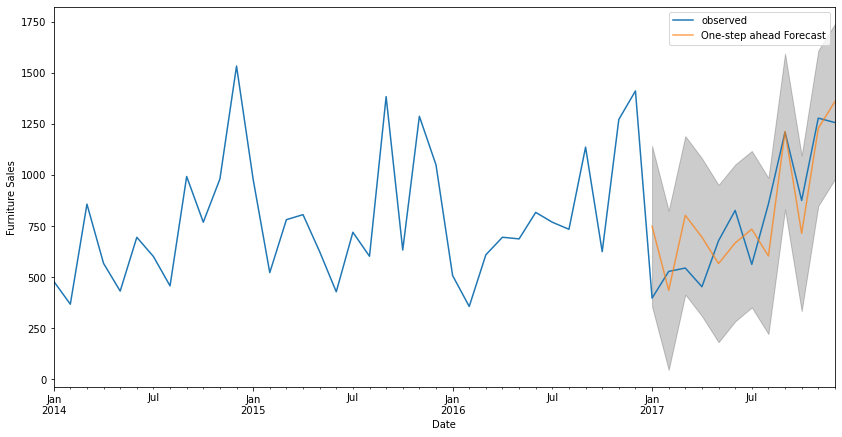

In [30]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
print(pred_ci)
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [31]:
y_predicted = pred.predicted_mean
y_true = y['2017-01-01':]
mse = ((y_predicted - y_true)**2).mean()
print('Mean Square Error is:', round(mse, 4))

Mean Square Error is: 35686.1287


In [32]:
print('Root Mean Square Error is:', np.sqrt(mse))

Root Mean Square Error is: 188.90772539236312


# FUTURE FORECASTS

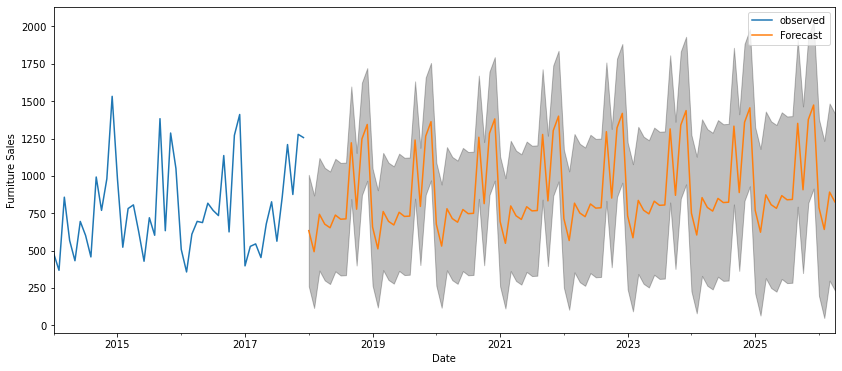

In [33]:
# Forecasting the future (out of sample) values.
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

# Furniture vs Office Supplies

In [34]:
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
furniture.shape, office.shape

((2121, 21), (6026, 21))

In [35]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)

furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')

furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()

furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')

y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()

furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [36]:
store = furniture.merge(office, on='Order Date', how='inner')
store.rename(columns={'Sales_x': 'Furniture Sales', 'Sales_y': 'Office Sales'}, inplace=True)
store.head()

,Order Date,Furniture Sales,Office Sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


# Visualizing Furniture vs Office Sales time series

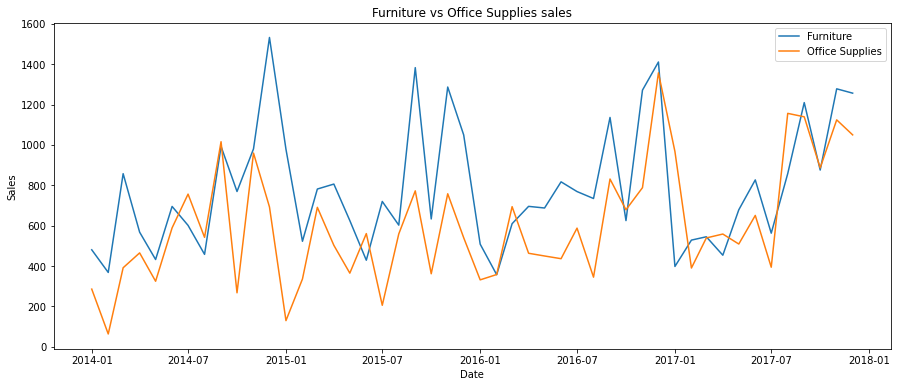

In [37]:
plt.figure(figsize=(15, 6))
plt.plot(store['Order Date'], store['Furniture Sales'], label='Furniture')
plt.plot(store['Order Date'], store['Office Sales'], label='Office Supplies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture vs Office Supplies sales')
plt.legend()